# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin","car_name"]
df = pd.read_csv('auto-mpg.data', sep=r'\s+', names=column_names, na_values='?')
df.to_csv("auto-mpg.csv", index=False)
# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [3]:
# Check for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [4]:
# Drop rows with missing values

df.dropna(inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

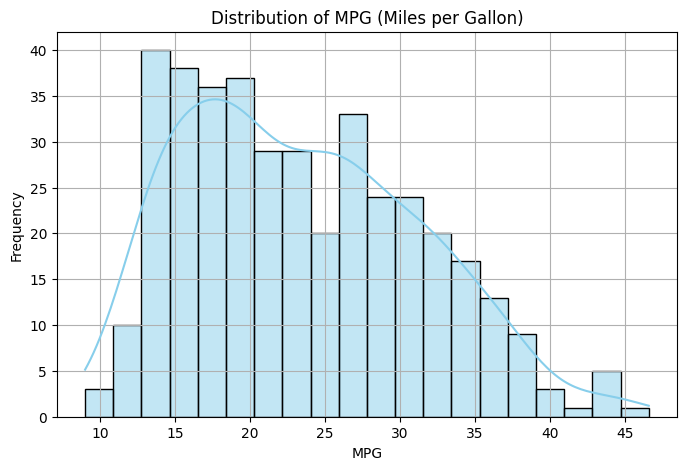

In [5]:
# Visualize MPG distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['mpg'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MPG (Miles per Gallon)')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

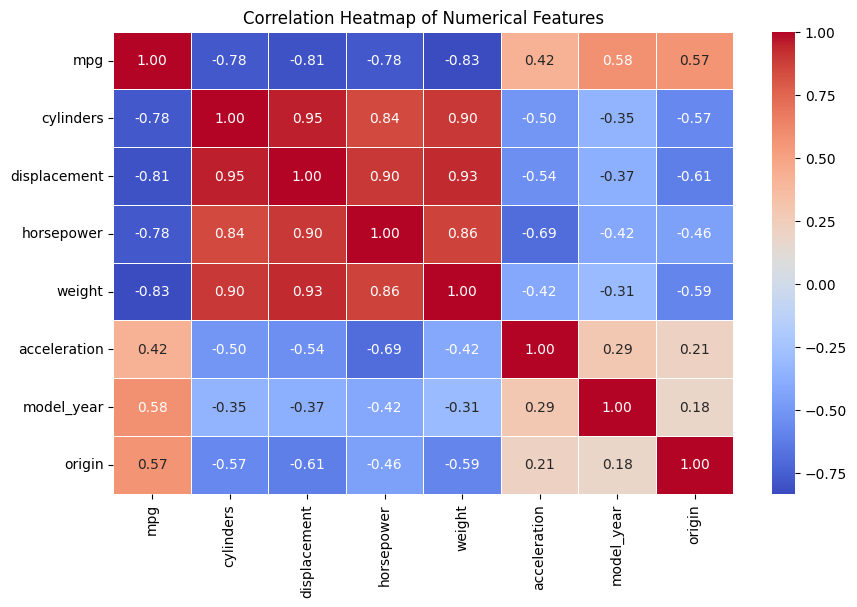

In [6]:
# Correlation heatmap (numerical features only)
numerical_df = df.select_dtypes(include=['float', 'int'])

corr = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:

# Encode categorical variables (Origin as categorical feature)
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

In [9]:
# Define features and target variable
df['horsepower'] = df['horsepower'].astype(float)

df.drop('car_name', axis=1, inplace=True)

x = df.drop('mpg', axis=1)
y = df['mpg']

NameError: name 'MinMaxScaler' is not defined

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
print("Shape of normalized features:", x_norm.shape)

Shape of normalized features: (392, 8)


In [12]:
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_2', 'origin_3'],
      dtype='object')


In [13]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [14]:

# Train a Linear Regression model
# Predictions
# Model evaluation
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.7923
Mean Squared Error: 10.60


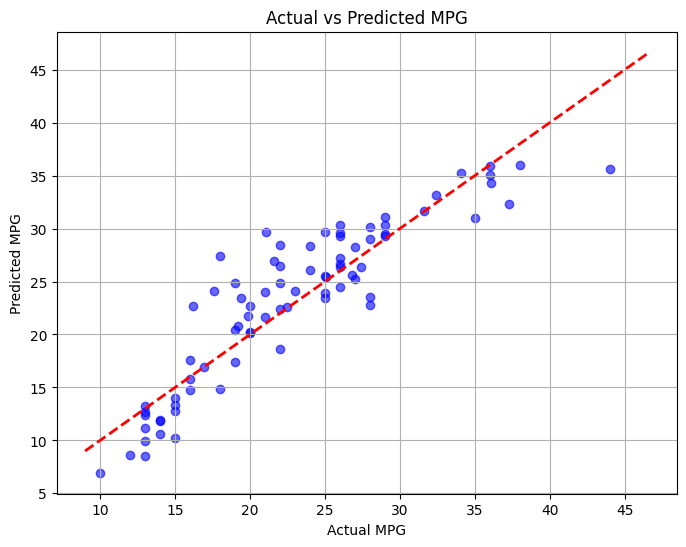

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.show()